## Setup ##

In [25]:
"""Visualize embeddings produced"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = '3'

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

## Load model/data ##

In [27]:
"""Load data"""
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels.h5'), 'r')['main']

em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]

In [33]:
"""Load model"""
N = 30000 #Iteration number
EXP_NAME = 'boundary_mask_on_augment_on_random_windows'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/boundary_mask_on_augment_on_random_windows/models/model30000.ckpt


In [34]:
"""Generate vector labels for a particular input image"""
em_train = em_imgs_train[0, 0:572, 0:572]
seg_train = seg_imgs_train[0, 0:572, 0:572]
vec_train = utils.generate_vector_labels(inputs, outputs, em_train, sess)

em_dev = em_imgs_dev[0, 0:572, 0:572]
seg_dev = seg_imgs_dev[0, 0:572, 0:572]
vec_dev = utils.generate_vector_labels(inputs, outputs, em_dev, sess)

# Crop input images to match output sizes 
l = (572-388)//2
u = l+388
em_train = em_train[l:u, l:u]
em_dev = em_dev[l:u, l:u]
seg_train = seg_train[l:u,l:u]
seg_dev = seg_dev[l:u,l:u]

In [30]:
"""Create images to visualize vector labels""" 
# RGB Projection
rgb_train = vec_train[:,:,0:3]
rgb_dev = vec_dev[:,:,0:3]

# Boundary map
def gradient_norm(vec_field):
  """Returns norm of gradient at each point in vec_field"""
  gx = vec_field[1:,:-1]-vec_field[:-1,:-1]
  gy = vec_field[:-1,1:]-vec_field[:-1,:-1]

  return np.sqrt(np.linalg.norm(gx,axis=-1)**2+np.linalg.norm(gy,axis=-1)**2)

vec_grad_train = gradient_norm(vec_train)
vec_grad_dev = gradient_norm(vec_dev)

# Fill in boundary map
thresh = 0.4
labels_train = labels = measure.label(vec_grad_train>thresh, background=1)
labels_dev = measure.label(vec_grad_dev>thresh, background=1)


## Display Images ## 

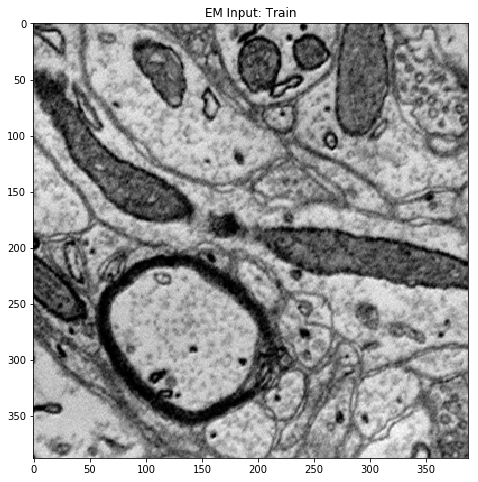

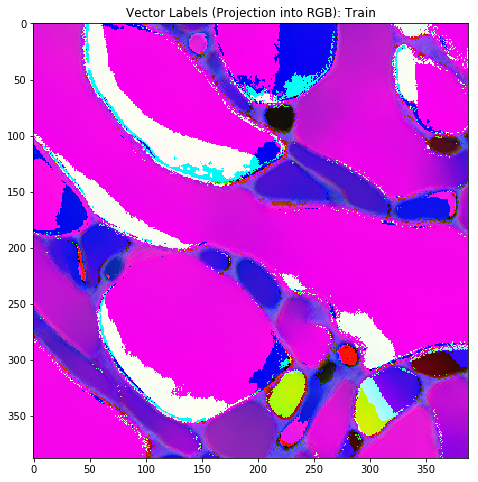

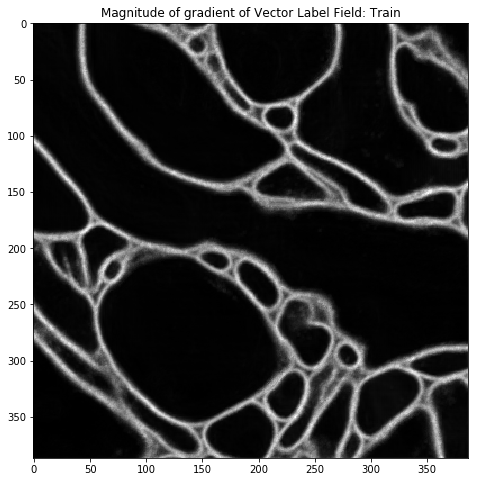

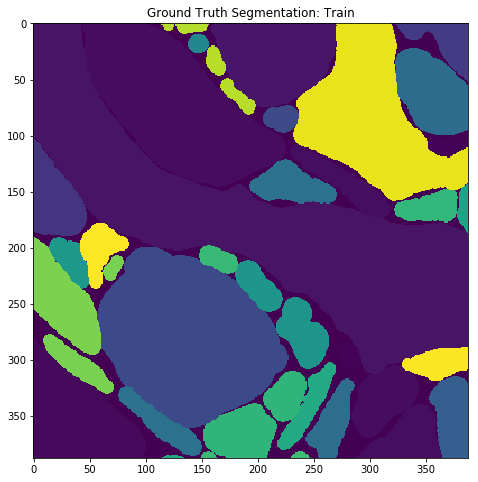

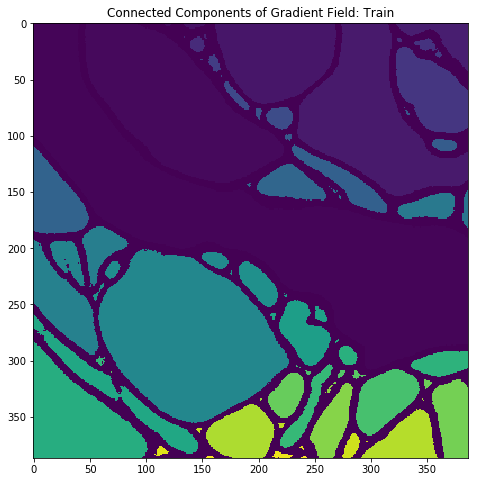

In [37]:
"""Display images: Train"""
plt.figure(figsize=(8,8))
plt.title('EM Input: Train')
plt.imshow(em_train, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Vector Labels (Projection into RGB): Train')
plt.imshow(rgb_train, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Magnitude of gradient of Vector Label Field: Train')
plt.imshow(vec_grad_train, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Ground Truth Segmentation: Train')
plt.imshow(seg_train)
plt.show()

plt.figure(figsize=(8,8))
plt.title('Connected Components of Gradient Field: Train')
plt.imshow(labels_train)
plt.show()

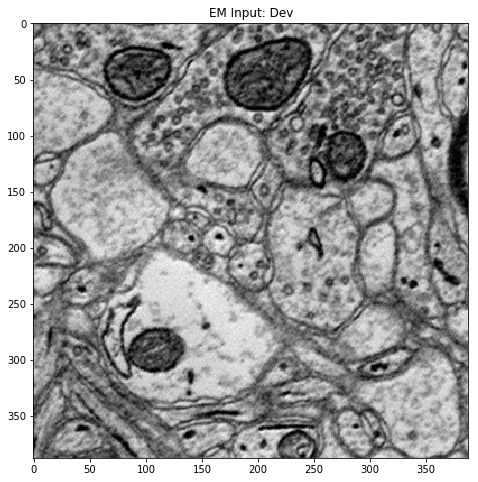

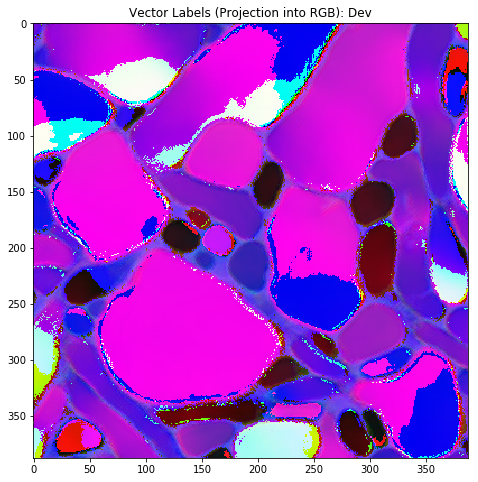

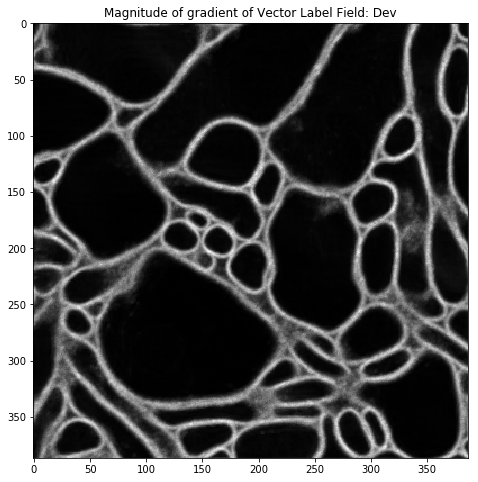

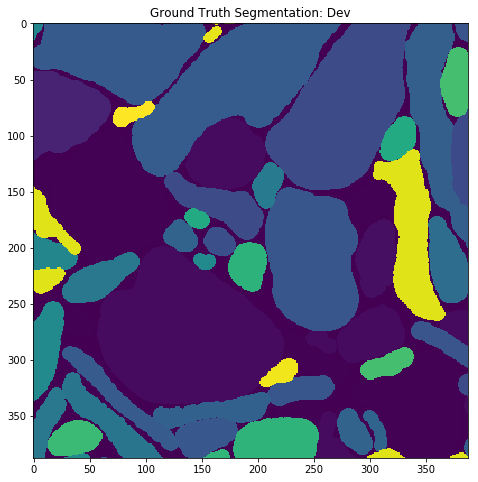

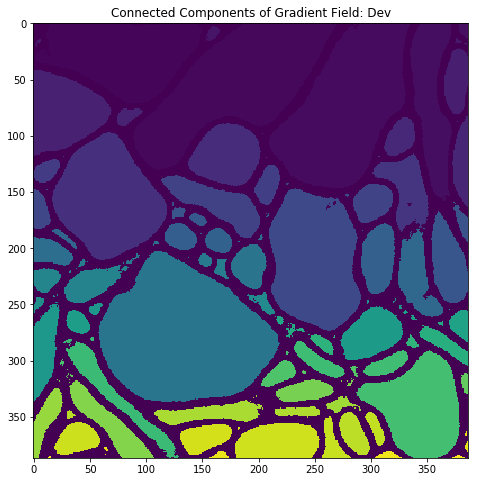

In [40]:
"""Display images: Dev"""
plt.figure(figsize=(8,8))
plt.title('EM Input: Dev')
plt.imshow(em_dev, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Vector Labels (Projection into RGB): Dev')
plt.imshow(rgb_dev, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Magnitude of gradient of Vector Label Field: Dev')
plt.imshow(vec_grad_dev, cmap='gray')
plt.show()

plt.figure(figsize=(8,8))
plt.title('Ground Truth Segmentation: Dev')
plt.imshow(seg_dev)
plt.show()

plt.figure(figsize=(8,8))
plt.title('Connected Components of Gradient Field: Dev')
plt.imshow(labels_dev)
plt.show()